#### Team 19 Project

#### Data Co-relation between crypto, S&P 500, Inflation - Vish

In [156]:
import pandas as pd
filtered_crypto_data = pd.read_csv('filtered_crypto_data.csv')
filtered_crypto_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03


In [157]:
crypto_data = filtered_crypto_data


In [158]:
row_count_per_crypto = filtered_crypto_data.groupby('symbol').count()
row_count_per_crypto

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
symbol,,,,,,,,,,,,
BTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
ETH,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
LTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
USDT,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
XRP,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429


In [159]:
inflation_data = pd.read_csv('inflation_data_final.csv')
inflation_data

,date,T10YIE
0,2015-01-01,1.71
1,2015-01-02,1.71
2,2015-01-03,1.71
3,2015-01-04,1.71
4,2015-01-05,1.64
...,...,...
1424,2018-11-25,1.96
1425,2018-11-26,1.96
1426,2018-11-27,1.91
1427,2018-11-28,1.94


In [160]:
sp500_data = pd.read_csv('sp500_data_final.csv')
sp500_data

,date,Ticker,Open,High,Low,Close,Volume
0,2015-01-01,VOO,190.75,190.91,188.38,188.40,"1,365,995"
1,2015-01-02,VOO,189.29,189.72,187.26,188.40,"1,864,986"
2,2015-01-03,VOO,189.29,189.72,187.26,188.40,"1,864,986"
3,2015-01-04,VOO,189.29,189.72,187.26,188.40,"1,864,986"
4,2015-01-05,VOO,187.26,187.41,184.66,185.09,"2,734,710"
...,...,...,...,...,...,...,...
1424,2018-11-25,VOO,241.80,243.35,241.73,242.01,"830,910"
1425,2018-11-26,VOO,244.23,245.84,243.85,245.80,"2,498,530"
1426,2018-11-27,VOO,244.73,246.60,244.12,246.57,"2,849,731"
1427,2018-11-28,VOO,247.72,252.33,246.75,252.33,"3,723,260"


In [161]:
crypto_data['date'] = pd.to_datetime(crypto_data['date'])
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         6867 non-null   object        
 1   symbol       6867 non-null   object        
 2   name         6867 non-null   object        
 3   date         6867 non-null   datetime64[ns]
 4   ranknow      6867 non-null   int64         
 5   open         6867 non-null   float64       
 6   high         6867 non-null   float64       
 7   low          6867 non-null   float64       
 8   close        6867 non-null   float64       
 9   volume       6867 non-null   float64       
 10  market       6867 non-null   float64       
 11  close_ratio  6867 non-null   float64       
 12  spread       6867 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 697.6+ KB


In [162]:
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

In [163]:
sp500_data.rename(columns={'Open': 'open', 'High': 'high','Low': 'low','Close': 'close','Volume': 'volume'}, inplace=True)
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1429 non-null   datetime64[ns]
 1   Ticker  1429 non-null   object        
 2   open    1429 non-null   float64       
 3   high    1429 non-null   float64       
 4   low     1429 non-null   float64       
 5   close   1429 non-null   float64       
 6   volume  1429 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 78.3+ KB


In [164]:
# Merge crypto and S&P 500 data
merged_data = pd.merge(crypto_data, sp500_data, on='date', how='inner', suffixes=('_crypto', '_sp500'))
merged_data

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995"
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986"
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986"
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986"
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03,VOO,241.80,243.35,241.73,242.01,"830,910"
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02,VOO,244.23,245.84,243.85,245.80,"2,498,530"
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03,VOO,244.73,246.60,244.12,246.57,"2,849,731"
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03,VOO,247.72,252.33,246.75,252.33,"3,723,260"


In [165]:
inflation_data.rename(columns={'T10YIE': 'inflation'}, inplace=True)

inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1429 non-null   object 
 1   inflation  1429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.5+ KB


In [166]:
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1429 non-null   datetime64[ns]
 1   inflation  1429 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.5 KB


In [167]:
# Merge with inflation data
merged_data = pd.merge(merged_data, inflation_data, on='date', how='inner')

# Display the merged dataset
print(merged_data.head())

      slug symbol     name       date  ranknow  open_crypto  high_crypto  \
0  bitcoin    BTC  Bitcoin 2015-01-01        1       320.43       320.43   
1  bitcoin    BTC  Bitcoin 2015-01-02        1       314.08       315.84   
2  bitcoin    BTC  Bitcoin 2015-01-03        1       314.85       315.15   
3  bitcoin    BTC  Bitcoin 2015-01-04        1       281.15       287.23   
4  bitcoin    BTC  Bitcoin 2015-01-05        1       265.08       278.34   

   low_crypto  close_crypto  volume_crypto        market  close_ratio  spread  \
0      314.00        314.25      8036550.0  4.297536e+09       0.0389    6.43   
1      313.57        315.03      7860650.0  4.309551e+09       0.6432    2.27   
2      281.08        281.08     33054400.0  3.846270e+09       0.0000   34.07   
3      257.61        264.20     55629100.0  3.616321e+09       0.2225   29.62   
4      265.08        274.47     43962800.0  3.758098e+09       0.7081   13.26   

  Ticker  open_sp500  high_sp500  low_sp500  close_sp500

In [168]:
merged_data

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,inflation
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995",1.71
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710",1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03,VOO,241.80,243.35,241.73,242.01,"830,910",1.96
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02,VOO,244.23,245.84,243.85,245.80,"2,498,530",1.96
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03,VOO,244.73,246.60,244.12,246.57,"2,849,731",1.91
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03,VOO,247.72,252.33,246.75,252.33,"3,723,260",1.94


In [169]:
print("\nMissing Values per Column:")
merged_data.isnull().sum()


Missing Values per Column:


slug             0
symbol           0
name             0
date             0
ranknow          0
open_crypto      0
high_crypto      0
low_crypto       0
close_crypto     0
volume_crypto    0
market           0
close_ratio      0
spread           0
Ticker           0
open_sp500       0
high_sp500       0
low_sp500        0
close_sp500      0
volume_sp500     0
inflation        0
dtype: int64

In [170]:
print("\nDuplicate Values per Column:")
print(merged_data.duplicated().sum())


Duplicate Values per Column:
0


In [171]:
merged_data.head()

,slug,symbol,name,date,ranknow,open_crypto,high_crypto,low_crypto,close_crypto,volume_crypto,market,close_ratio,spread,Ticker,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,inflation
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,4.297536e+09,0.0389,6.43,VOO,190.75,190.91,188.38,188.40,"1,365,995",1.71
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,4.309551e+09,0.6432,2.27,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,3.846270e+09,0.0000,34.07,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,3.616321e+09,0.2225,29.62,VOO,189.29,189.72,187.26,188.40,"1,864,986",1.71
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,3.758098e+09,0.7081,13.26,VOO,187.26,187.41,184.66,185.09,"2,734,710",1.64


              Crypto_Close  SP500_Close  Inflation
Crypto_Close      1.000000     0.325977   0.248929
SP500_Close       0.325977     1.000000   0.834050
Inflation         0.248929     0.834050   1.000000


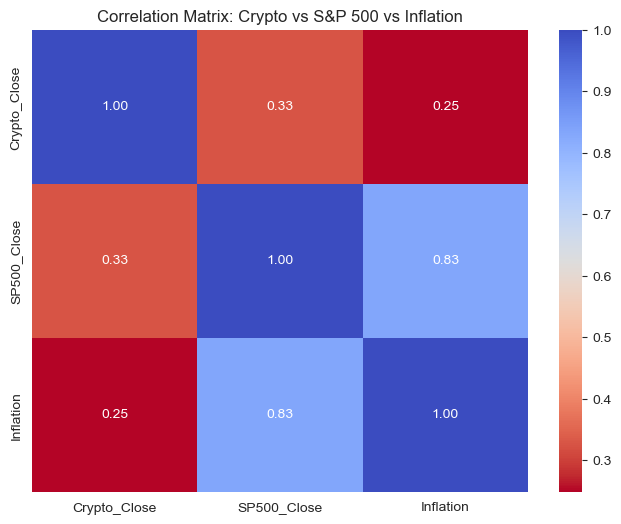

In [172]:
# Select relevant columns for correlation analysis
correlation_data = merged_data[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix: Crypto vs S&P 500 vs Inflation')
plt.show()

      slug symbol     name       date  ranknow  open_crypto  high_crypto  \
0  bitcoin    BTC  Bitcoin 2015-01-01        1       320.43       320.43   
1  bitcoin    BTC  Bitcoin 2015-01-02        1       314.08       315.84   
2  bitcoin    BTC  Bitcoin 2015-01-03        1       314.85       315.15   
3  bitcoin    BTC  Bitcoin 2015-01-04        1       281.15       287.23   
4  bitcoin    BTC  Bitcoin 2015-01-05        1       265.08       278.34   

   low_crypto  close_crypto  volume_crypto        market  close_ratio  spread  \
0      314.00        314.25      8036550.0  4.297536e+09       0.0389    6.43   
1      313.57        315.03      7860650.0  4.309551e+09       0.6432    2.27   
2      281.08        281.08     33054400.0  3.846270e+09       0.0000   34.07   
3      257.61        264.20     55629100.0  3.616321e+09       0.2225   29.62   
4      265.08        274.47     43962800.0  3.758098e+09       0.7081   13.26   

  Ticker  open_sp500  high_sp500  low_sp500  close_sp500

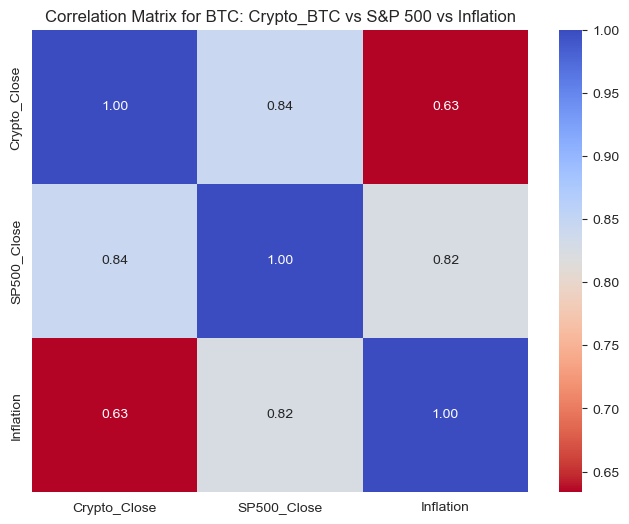

In [173]:
# List of cryptocurrency symbols to filter
BTC_filter = ['BTC']

# Filter the dataset
merged_data_BTC = merged_data[merged_data['symbol'].isin(BTC_filter)]

# Display the filtered data
print(merged_data_BTC.head())

# Select relevant columns for correlation analysis
correlation_data_BTC = merged_data_BTC[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_BTC.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_BTC = correlation_data_BTC.corr()
print(correlation_matrix_BTC)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_BTC, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for BTC: Crypto_BTC vs S&P 500 vs Inflation')
plt.show()

        slug symbol    name       date  ranknow  open_crypto  high_crypto  \
5498  tether   USDT  Tether 2015-02-25        8     1.210000     1.220000   
5499  tether   USDT  Tether 2015-02-26        8     1.210000     1.210000   
5500  tether   USDT  Tether 2015-03-02        8     0.571249     0.607890   
5501  tether   USDT  Tether 2015-03-03        8     0.605129     0.606229   
5502  tether   USDT  Tether 2015-03-06        8     1.000000     1.000000   

      low_crypto  close_crypto  volume_crypto    market  close_ratio  spread  \
5498    1.210000      1.210000            6.0  304713.0       0.0000    0.01   
5499    1.190000      1.210000            6.0  303364.0       1.0000    0.02   
5500    0.568314      0.606502            3.0  152596.0       0.9649    0.04   
5501    0.604416      0.606229            3.0  152527.0       1.0000    0.00   
5502    1.000000      1.000000           93.0  251600.0       0.0000    0.00   

     Ticker  open_sp500  high_sp500  low_sp500  close_sp

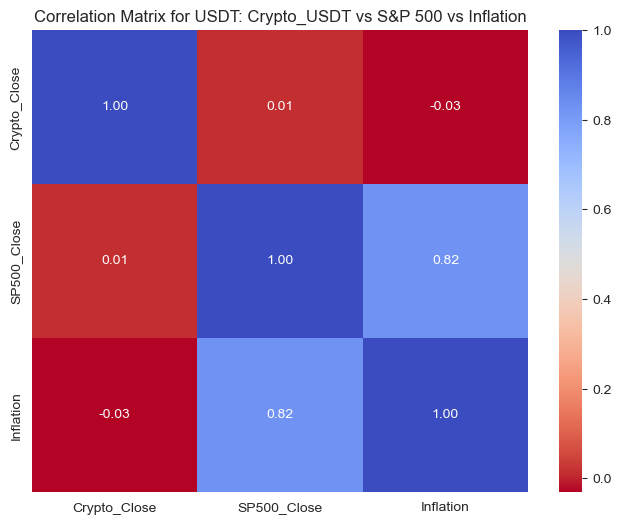

In [174]:
# List of cryptocurrency symbols to filter
USDT_filter = ['USDT']

# Filter the dataset
merged_data_USDT = merged_data[merged_data['symbol'].isin(USDT_filter)]

# Display the filtered data
print(merged_data_USDT.head())

# Select relevant columns for correlation analysis
correlation_data_USDT = merged_data_USDT[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_USDT.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_USDT = correlation_data_USDT.corr()
print(correlation_matrix_USDT)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_USDT, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for USDT: Crypto_USDT vs S&P 500 vs Inflation')
plt.show()

          slug symbol      name       date  ranknow  open_crypto  high_crypto  \
2858  ethereum    ETH  Ethereum 2015-08-07        3     2.830000     3.540000   
2859  ethereum    ETH  Ethereum 2015-08-08        3     2.790000     2.800000   
2860  ethereum    ETH  Ethereum 2015-08-09        3     0.706136     0.879810   
2861  ethereum    ETH  Ethereum 2015-08-10        3     0.713989     0.729854   
2862  ethereum    ETH  Ethereum 2015-08-11        3     0.708087     1.130000   

      low_crypto  close_crypto  volume_crypto       market  close_ratio  \
2858    2.520000      2.770000       164329.0  166610555.0       0.2451   
2859    0.714725      0.753325       674188.0   45486894.0       0.0185   
2860    0.629191      0.701897       532170.0   42399573.0       0.2901   
2861    0.636546      0.708448       405283.0   42818364.0       0.7706   
2862    0.663235      1.070000      1463100.0   64569288.0       0.8715   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_

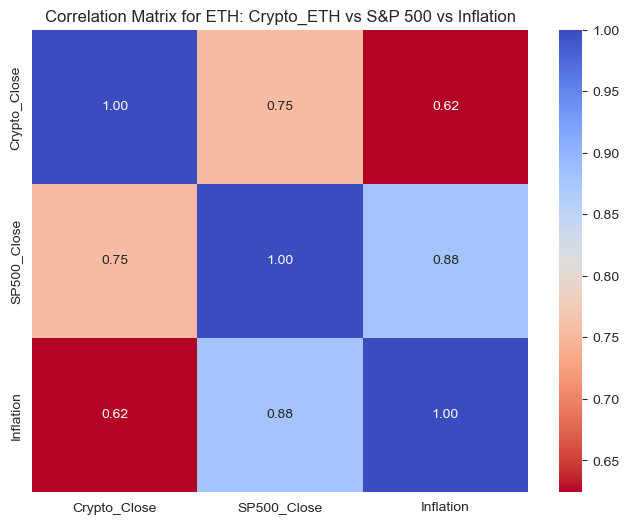

In [175]:
# List of cryptocurrency symbols to filter
ETH_filter = ['ETH']

# Filter the dataset
merged_data_ETH = merged_data[merged_data['symbol'].isin(ETH_filter)]

# Display the filtered data
print(merged_data_ETH.head())

# Select relevant columns for correlation analysis
correlation_data_ETH = merged_data_ETH[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_ETH.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_ETH = correlation_data_ETH.corr()
print(correlation_matrix_ETH)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ETH, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for ETH: Crypto_ETH vs S&P 500 vs Inflation')
plt.show()

        slug symbol name       date  ranknow  open_crypto  high_crypto  \
1429  ripple    XRP  XRP 2015-01-01        2     0.024455     0.024455   
1430  ripple    XRP  XRP 2015-01-02        2     0.024377     0.024423   
1431  ripple    XRP  XRP 2015-01-03        2     0.024297     0.024317   
1432  ripple    XRP  XRP 2015-01-04        2     0.022100     0.022142   
1433  ripple    XRP  XRP 2015-01-05        2     0.018943     0.020316   

      low_crypto  close_crypto  volume_crypto       market  close_ratio  \
1429    0.024205      0.024390       399022.0  755558352.0       0.7400   
1430    0.024309      0.024318       459956.0  753340322.0       0.0789   
1431    0.022106      0.022106      2171040.0  684798233.0       0.0000   
1432    0.018828      0.018928      3801010.0  586349910.0       0.0302   
1433    0.018890      0.020316      3051930.0  629350576.0       1.0000   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_sp500  \
1429     0.0    VOO      190.75  

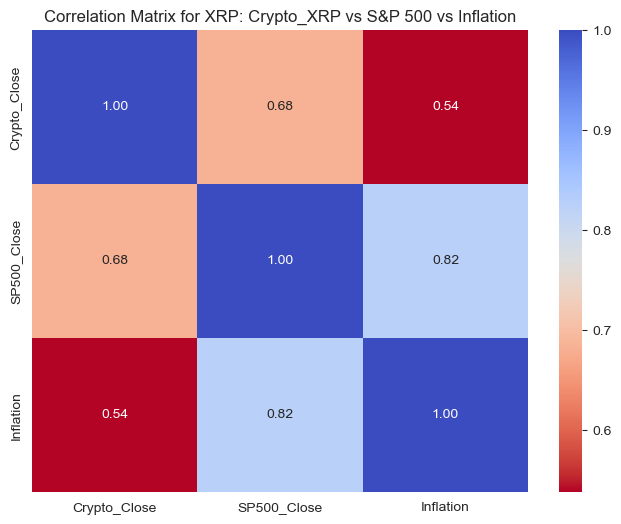

In [176]:
# List of cryptocurrency symbols to filter
XRP_filter = ['XRP']

# Filter the dataset
merged_data_XRP = merged_data[merged_data['symbol'].isin(XRP_filter)]

# Display the filtered data
print(merged_data_XRP.head())

# Select relevant columns for correlation analysis
correlation_data_XRP = merged_data_XRP[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_XRP.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_XRP = correlation_data_XRP.corr()
print(correlation_matrix_XRP)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_XRP, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for XRP: Crypto_XRP vs S&P 500 vs Inflation')
plt.show()

          slug symbol      name       date  ranknow  open_crypto  high_crypto  \
4069  litecoin    LTC  Litecoin 2015-01-01        7         2.72         2.72   
4070  litecoin    LTC  Litecoin 2015-01-02        7         2.70         2.70   
4071  litecoin    LTC  Litecoin 2015-01-03        7         2.67         2.67   
4072  litecoin    LTC  Litecoin 2015-01-04        7         2.11         2.15   
4073  litecoin    LTC  Litecoin 2015-01-05        7         1.96         2.16   

      low_crypto  close_crypto  volume_crypto      market  close_ratio  \
4069        2.69          2.70       770693.0  95086868.0       0.3333   
4070        2.66          2.67       855392.0  94048724.0       0.2500   
4071        2.13          2.13      5193080.0  75275386.0       0.0000   
4072        1.91          1.96      3888140.0  69101043.0       0.2083   
4073        1.96          2.08     10649500.0  73586957.0       0.6000   

      spread Ticker  open_sp500  high_sp500  low_sp500  close_sp500 

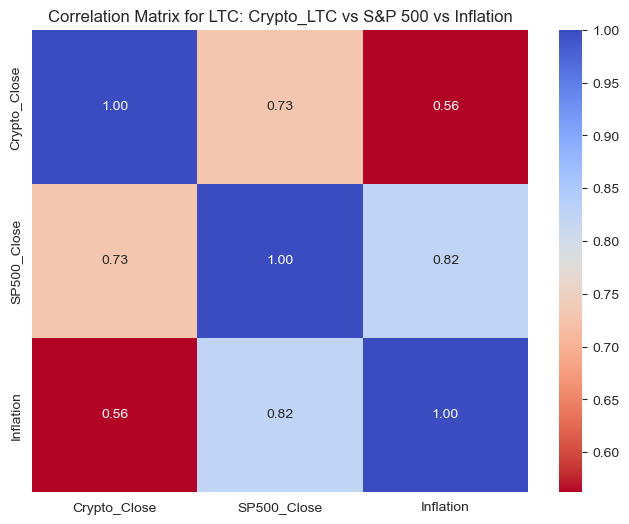

In [177]:
# List of cryptocurrency symbols to filter
LTC_filter = ['LTC']

# Filter the dataset
merged_data_LTC = merged_data[merged_data['symbol'].isin(LTC_filter)]

# Display the filtered data
print(merged_data_LTC.head())

# Select relevant columns for correlation analysis
correlation_data_LTC = merged_data_LTC[['close_crypto', 'close_sp500', 'inflation']]

# Rename columns for clarity
correlation_data_LTC.columns = ['Crypto_Close', 'SP500_Close', 'Inflation']

# Calculate correlation matrix
correlation_matrix_LTC = correlation_data_LTC.corr()
print(correlation_matrix_LTC)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_LTC, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Correlation Matrix for LTC: Crypto_LTC vs S&P 500 vs Inflation')
plt.show()

**Here we decided that since the correlation between crypto , snp500 and Inflation is negative. We only proceed with our original dataset that is crypto.**

#### Data loading, Data Exploring, Data cleaning, Data Wrangling - Eromosele

In [178]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("jessevent/all-crypto-currencies")
print("Path to dataset files:", path)

# Assuming the downloaded dataset contains 'crypto-markets.csv'
df_crypto = pd.read_csv(path + '/crypto-markets.csv')

print("DataFrame shape:", df_crypto.shape)
display(df_crypto.head())

Path to dataset files: /Users/praveensree/.cache/kagglehub/datasets/jessevent/all-crypto-currencies/versions/17
DataFrame shape: (942297, 13)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


<bound method NDFrame.describe of              slug symbol       name        date  ranknow      open      high  \
0         bitcoin    BTC    Bitcoin  2013-04-28        1    135.30    135.98   
1         bitcoin    BTC    Bitcoin  2013-04-29        1    134.44    147.49   
2         bitcoin    BTC    Bitcoin  2013-04-30        1    144.00    146.93   
3         bitcoin    BTC    Bitcoin  2013-05-01        1    139.00    139.89   
4         bitcoin    BTC    Bitcoin  2013-05-02        1    116.38    125.60   
...           ...    ...        ...         ...      ...       ...       ...   
942292  project-x  NANOX  Project-X  2018-11-26     1727  22424.60  23049.30   
942293  project-x  NANOX  Project-X  2018-11-27     1727  20711.90  23742.10   
942294  project-x  NANOX  Project-X  2018-11-28     1727  23320.90  25235.10   
942295  project-x  NANOX  Project-X  2018-11-29     1727  24543.53  24582.47   
942296  project-x  NANOX  Project-X  2018-11-30     1727  22872.09  23086.98   

     


Missing values per column:
 slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


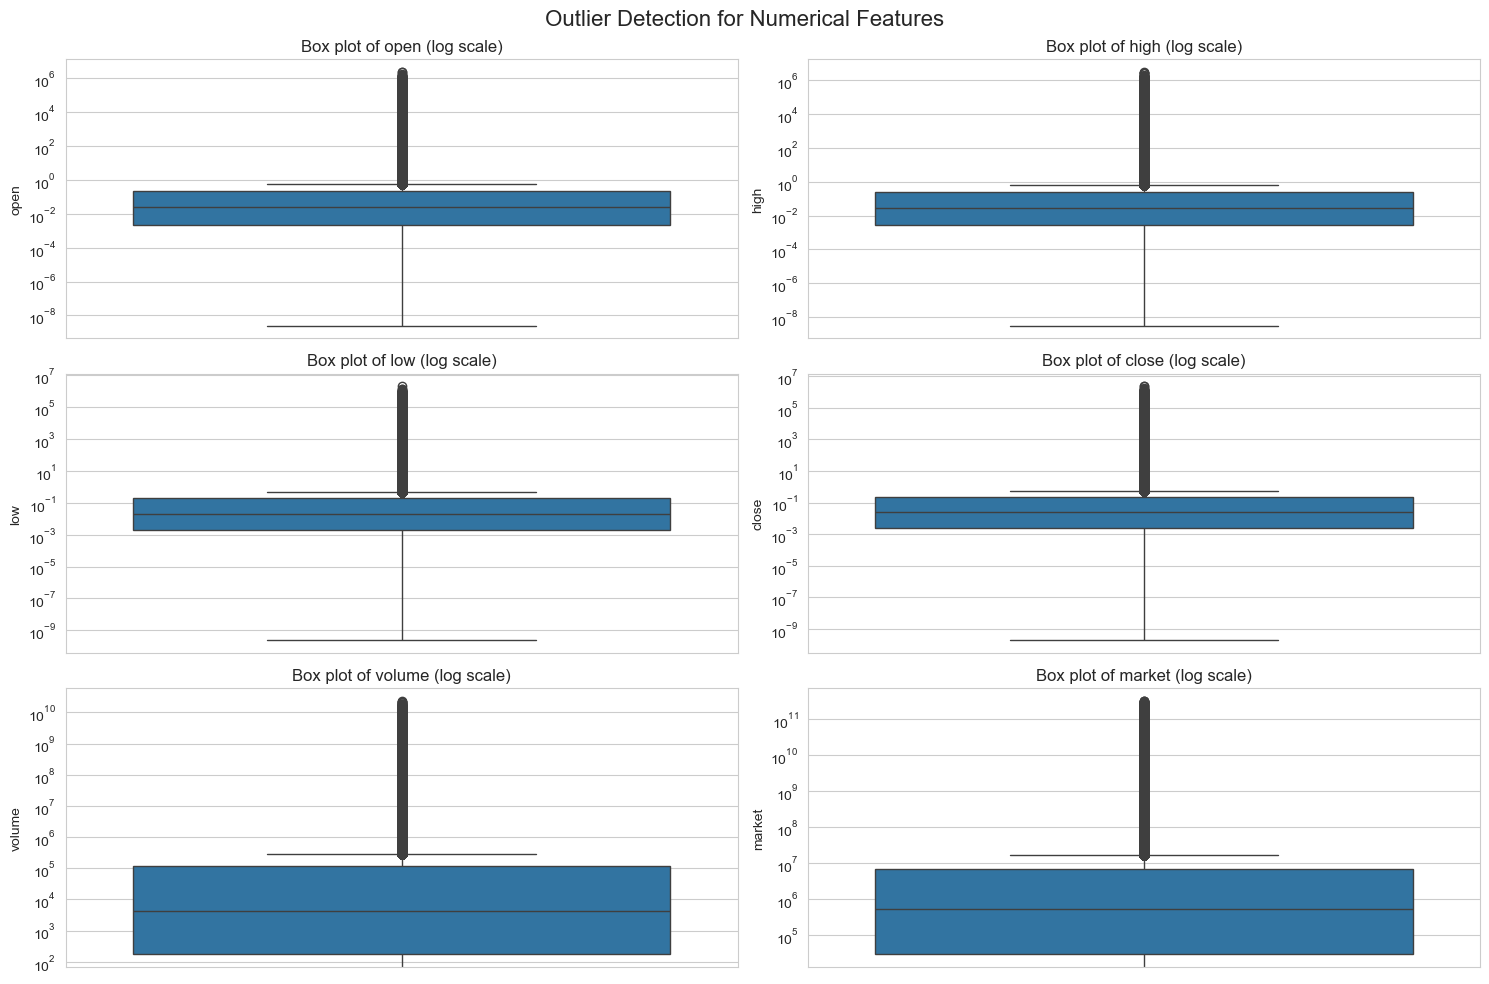


Top 10 cryptocurrencies by average volume (2015-2018):
symbol
BTC     2.065705e+09
ETH     8.544199e+08
USDT    7.733304e+08
BCH     7.542181e+08
EOS     5.985996e+08
XRP     2.694221e+08
TRX     2.571595e+08
LTC     1.961573e+08
QTUM    1.893066e+08
ETC     1.685421e+08
Name: volume, dtype: float64


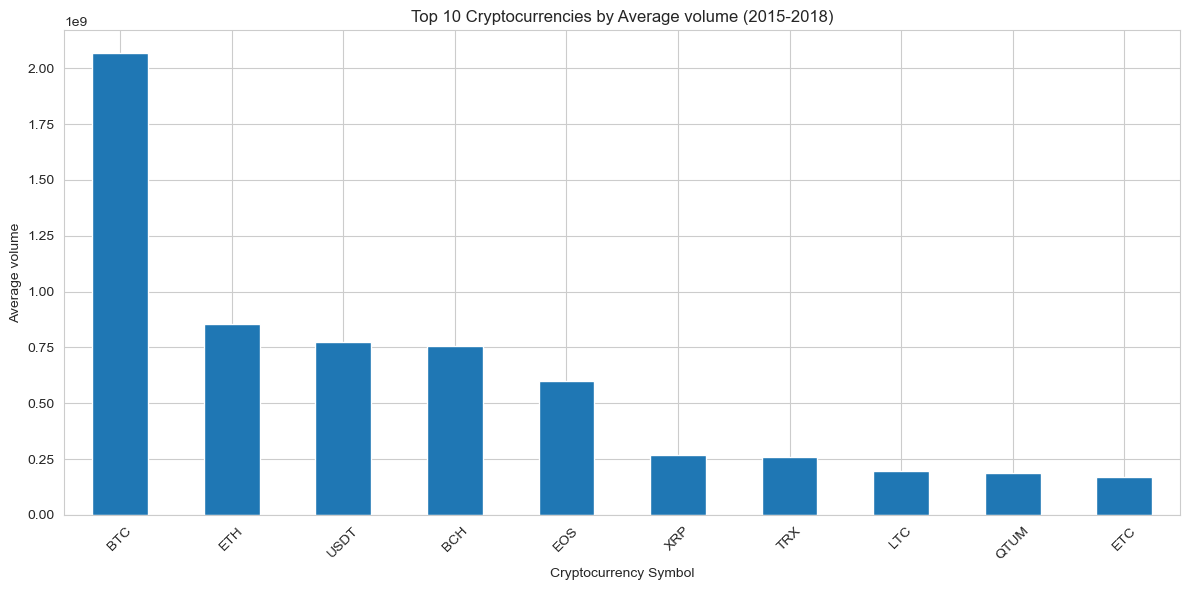

In [179]:
""" 
# Data Overview
print("Shape of the DataFrame:", df_crypto.shape)
display(df_crypto.describe())
print("\nUnique cryptocurrencies (symbol):", df_crypto['symbol'].unique())
print("\nUnique cryptocurrencies (name):", df_crypto['name'].unique()) 
"""

# Examine the descriptive statistics of numerical columns
display(df_crypto.describe)

# Missing Values
print("\nMissing values per column:\n", df_crypto.isnull().sum())

# Outlier Detection (using box plots for key numerical features)
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10})

numerical_features = ['open', 'high', 'low', 'close', 'volume', 'market']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    # Use log scale for better visualization as crypto data often has extreme outliers
    sns.boxplot(y=df_crypto[col])
    plt.yscale('log')
    plt.title(f'Box plot of {col} (log scale)')
    plt.tight_layout()

plt.suptitle("Outlier Detection for Numerical Features", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

# Top 10 Cryptocurrencies by volume
# Filter data for 2015-01-01 to 2018-12-31
df_filtered = df_crypto[(df_crypto['date'] >= '2015-01-01') & (df_crypto['date'] <= '2018-12-31')]

# Group by symbol and calculate average volume value
average_volume = df_filtered.groupby('symbol')['volume'].mean()


""" 
# Group by symbol and calculate average market cap value
average_market_cap = df_filtered.groupby('symbol')['market'].mean()

# Combine the average market capitalization and trading volume into a single DataFrame
crypto_stats = pd.DataFrame({'avg_market_cap': avg_market_cap, 'avg_volume': avg_volume})

# Sort the DataFrame by average market capitalization and trading volume in descending order
crypto_stats_sorted = crypto_stats.sort_values(['avg_market_cap', 'avg_volume'], ascending=[False, False])

# Select the top 10 cryptocurrencies based on average market capitalization and trading volume
top_10_cryptocurrencies = crypto_stats_sorted.head(10)

# Display the top 10 cryptocurrencies
display(top_10_cryptocurrencies) 
"""


# Sort by average volume cap and get the top 10
top_10_crypto = average_volume.sort_values(ascending=False).head(10)
print("\nTop 10 cryptocurrencies by average volume (2015-2018):")
print(top_10_crypto)

# Visualize top 10 cryptos
plt.figure(figsize=(12, 6))
top_10_crypto.plot(kind='bar')
plt.title('Top 10 Cryptocurrencies by Average volume (2015-2018)')
plt.xlabel('Cryptocurrency Symbol')
plt.ylabel('Average volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
# Create an explicit copy of the filtered DataFrame to avoid SettingWithCopyWarning
df_filtered = df_crypto[(df_crypto['date'] >= '2015-01-01') & (df_crypto['date'] <= '2018-12-31')].copy()

# Winsorize numerical features (clip values between 1st and 99th percentiles)
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'market']
for col in numerical_cols:
    if col in df_filtered.columns:
        lower_bound = np.percentile(df_filtered[col], 1)
        upper_bound = np.percentile(df_filtered[col], 99)
        df_filtered.loc[:, col] = np.clip(df_filtered[col], lower_bound, upper_bound)

# Check for inconsistencies in data types
print("Data types after cleaning:")
display(df_filtered.dtypes)

# Check for and handle duplicate rows
print("\nNumber of rows before removing duplicates:", len(df_filtered))
df_filtered = df_filtered.drop_duplicates(subset=['date', 'symbol'])
print("\nNumber of rows after removing duplicates:", len(df_filtered))

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of cleaned dataset:")
display(df_filtered.head())

# Check for any remaining missing values
print("\nRemaining missing values after cleaning:")
print(df_filtered.isnull().sum())

Data types after cleaning:


slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object


Number of rows before removing duplicates: 893601

Number of rows after removing duplicates: 880393

First few rows of cleaned dataset:


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
613,bitcoin,BTC,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,1.373101e+09,0.0389,6.43
614,bitcoin,BTC,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,1.373101e+09,0.6432,2.27
615,bitcoin,BTC,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,1.373101e+09,0.0000,34.07
616,bitcoin,BTC,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,1.373101e+09,0.2225,29.62
617,bitcoin,BTC,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,1.373101e+09,0.7081,13.26



Remaining missing values after cleaning:
slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [181]:
# Create a copy to avoid SettingWithCopyWarning
df_filtered_copy = df_filtered.copy()

# Filter for top 10 cryptocurrencies
top_10_crypto = ['BTC', 'ETH', 'BCH', 'XRP', 'ADA', 'EOS', 'MIOTA', 'TRX', 'LTC', 'NEO']
df_filtered_copy = df_filtered_copy[df_filtered_copy['symbol'].isin(top_10_crypto)]

# Format date column (ensure it's datetime type and sort)
df_filtered_copy['date'] = pd.to_datetime(df_filtered_copy['date'])
df_filtered_copy = df_filtered_copy.sort_values(['symbol', 'date'])

# Calculate technical indicators for each cryptocurrency
for symbol in top_10_crypto:
    # Create a mask for the current symbol
    symbol_mask = df_filtered_copy['symbol'] == symbol

    # Get data for the current symbol
    df_symbol = df_filtered_copy[symbol_mask]

    # Calculate Simple Moving Average (7-day)
    df_filtered_copy.loc[symbol_mask, 'SMA_7'] = df_symbol['close'].rolling(window=7, min_periods=1).mean()

    # Calculate Relative Strength Index (14-day)
    delta = df_symbol['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df_filtered_copy.loc[symbol_mask, 'RSI_14'] = 100 - (100 / (1 + rs))

    # Calculate Exponential Moving Averages (12 and 26-day)
    df_filtered_copy.loc[symbol_mask, 'EMA_12'] = df_symbol['close'].ewm(span=12, adjust=False).mean()
    df_filtered_copy.loc[symbol_mask, 'EMA_26'] = df_symbol['close'].ewm(span=26, adjust=False).mean()

    # Calculate MACD (Moving Average Convergence Divergence)
    df_filtered_copy.loc[symbol_mask, 'MACD'] = (
        df_filtered_copy.loc[symbol_mask, 'EMA_12'] - df_filtered_copy.loc[symbol_mask, 'EMA_26']
    )

    # Calculate Bollinger Bands (20-day)
    df_filtered_copy.loc[symbol_mask, 'SMA_20'] = df_symbol['close'].rolling(window=20, min_periods=1).mean()
    df_filtered_copy.loc[symbol_mask, 'STD_20'] = df_symbol['close'].rolling(window=20, min_periods=1).std()
    df_filtered_copy.loc[symbol_mask, 'Upper_Band'] = (
        df_filtered_copy.loc[symbol_mask, 'SMA_20'] + (df_filtered_copy.loc[symbol_mask, 'STD_20'] * 2)
    )
    df_filtered_copy.loc[symbol_mask, 'Lower_Band'] = (
        df_filtered_copy.loc[symbol_mask, 'SMA_20'] - (df_filtered_copy.loc[symbol_mask, 'STD_20'] * 2)
    )

# Handle missing values using ffill() instead of deprecated method='ffill'
df_filtered_copy = df_filtered_copy.ffill()

# Display the first few rows of the processed dataframe
display(df_filtered_copy.head())

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,spread,SMA_7,RSI_14,EMA_12,EMA_26,MACD,SMA_20,STD_20,Upper_Band,Lower_Band
11219,cardano,ADA,Cardano,2017-10-01,10,0.021678,0.032226,0.017354,0.024969,50068700.0,...,0.01,0.024969,NaN,0.024969,0.024969,0.000000,0.024969,NaN,NaN,NaN
11220,cardano,ADA,Cardano,2017-10-02,10,0.024607,0.030088,0.019969,0.025932,57641300.0,...,0.01,0.025451,100.000000,0.025117,0.025040,0.000077,0.025451,0.000681,0.026812,0.024089
11221,cardano,ADA,Cardano,2017-10-03,10,0.025757,0.027425,0.020690,0.020816,16997800.0,...,0.01,0.023906,15.841421,0.024455,0.024727,-0.000272,0.023906,0.002719,0.029343,0.018468
11222,cardano,ADA,Cardano,2017-10-04,10,0.020864,0.022806,0.020864,0.021931,9000050.0,...,0.00,0.023412,28.885182,0.024067,0.024520,-0.000453,0.023412,0.002429,0.028271,0.018553
11223,cardano,ADA,Cardano,2017-10-05,10,0.021951,0.022154,0.020859,0.021489,5562510.0,...,0.00,0.023027,27.213201,0.023670,0.024296,-0.000625,0.023027,0.002273,0.027573,0.018481


#### Data Splitting, Feature Engineering - Sree

In [182]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define function to classify market conditions based on percent changes
def classify_market_condition(close_prices):
    """Classifies market conditions based on percentage change in closing prices."""
    percent_change = close_prices.pct_change()
    conditions = [
        percent_change > 0.01,    # Bullish (>1% increase)
        (percent_change <= 0.01) & (percent_change >= -0.01),  # Sideways (between -1% and 1%)
        percent_change < -0.01    # Bearish (>1% decrease)
    ]
    choices = ['bullish', 'sideways', 'bearish']
    market_conditions = np.select(conditions, choices, default='sideways')
    return market_conditions

# Create target variable by applying classification function
df_filtered_copy['market_condition'] = classify_market_condition(df_filtered_copy['close'])

# Prepare data for time series splitting
X = df_filtered_copy.drop('market_condition', axis=1)
y = df_filtered_copy['market_condition']

# Create TimeSeriesSplit object with 3 folds
tscv = TimeSeriesSplit(n_splits=3)

# Initialize empty lists to store splits
X_train_list, X_val_list, X_test_list = [], [], []
y_train_list, y_val_list, y_test_list = [], [], []

# Perform time series cross-validation splits
for train_index, test_index in tscv.split(X):
    # Split into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Further split test set into validation and test sets
    split_point = int(len(X_test)/2)
    X_val = X_test.iloc[:split_point]
    X_test = X_test.iloc[split_point:]
    y_val = y_test.iloc[:split_point]
    y_test = y_test.iloc[split_point:]

    # Append to respective lists
    X_train_list.append(X_train)
    X_val_list.append(X_val)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_val_list.append(y_val)
    y_test_list.append(y_test)

# Concatenate the lists to create final datasets
X_train = pd.concat(X_train_list)
X_val = pd.concat(X_val_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_val = pd.concat(y_val_list)
y_test = pd.concat(y_test_list)

# Display sample of training data
display(X_train.head())
display(y_train.head())

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,spread,SMA_7,RSI_14,EMA_12,EMA_26,MACD,SMA_20,STD_20,Upper_Band,Lower_Band
11219,cardano,ADA,Cardano,2017-10-01,10,0.021678,0.032226,0.017354,0.024969,50068700.0,...,0.01,0.024969,NaN,0.024969,0.024969,0.000000,0.024969,NaN,NaN,NaN
11220,cardano,ADA,Cardano,2017-10-02,10,0.024607,0.030088,0.019969,0.025932,57641300.0,...,0.01,0.025451,100.000000,0.025117,0.025040,0.000077,0.025451,0.000681,0.026812,0.024089
11221,cardano,ADA,Cardano,2017-10-03,10,0.025757,0.027425,0.020690,0.020816,16997800.0,...,0.01,0.023906,15.841421,0.024455,0.024727,-0.000272,0.023906,0.002719,0.029343,0.018468
11222,cardano,ADA,Cardano,2017-10-04,10,0.020864,0.022806,0.020864,0.021931,9000050.0,...,0.00,0.023412,28.885182,0.024067,0.024520,-0.000453,0.023412,0.002429,0.028271,0.018553
11223,cardano,ADA,Cardano,2017-10-05,10,0.021951,0.022154,0.020859,0.021489,5562510.0,...,0.00,0.023027,27.213201,0.023670,0.024296,-0.000625,0.023027,0.002273,0.027573,0.018481


11219    sideways
11220     bullish
11221     bearish
11222     bullish
11223     bearish
Name: market_condition, dtype: object

In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define lag features - modified to handle potential duplicates
def create_lag_features(df, columns, lags):
    df_result = df.copy()
    for col in columns:
        for lag in lags:
            # Process each cryptocurrency separately
            for symbol in df_result['symbol'].unique():
                mask = df_result['symbol'] == symbol
                df_result.loc[mask, f'{col}_lag_{lag}'] = df_result.loc[mask, col].shift(lag)
    return df_result

# Define rolling statistics features - modified to handle potential duplicates
def create_rolling_features(df, columns, windows):
    df_result = df.copy()
    for col in columns:
        for window in windows:
            # Process each cryptocurrency separately
            for symbol in df_result['symbol'].unique():
                mask = df_result['symbol'] == symbol
                df_result.loc[mask, f'{col}_rolling_mean_{window}'] = df_result.loc[mask, col].rolling(window=window, min_periods=1).mean()
                df_result.loc[mask, f'{col}_rolling_std_{window}'] = df_result.loc[mask, col].rolling(window=window, min_periods=1).std()
    return df_result

# Lagged features
lag_features = ['close', 'volume']
lag_periods = [1, 3, 5, 7]
X_train = create_lag_features(X_train, lag_features, lag_periods)
X_val = create_lag_features(X_val, lag_features, lag_periods)
X_test = create_lag_features(X_test, lag_features, lag_periods)

# Rolling statistics
rolling_features = ['close', 'volume']
rolling_windows = [7, 14, 21]
X_train = create_rolling_features(X_train, rolling_features, rolling_windows)
X_val = create_rolling_features(X_val, rolling_features, rolling_windows)
X_test = create_rolling_features(X_test, rolling_features, rolling_windows)

# Feature scaling
scaler = MinMaxScaler()
features_to_scale = ['open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread',
                     'SMA_7', 'RSI_14', 'EMA_12', 'EMA_26', 'MACD', 'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band']

# Add generated feature names to the list
for col in lag_features:
    for lag in lag_periods:
        features_to_scale.append(f'{col}_lag_{lag}')
for col in rolling_features:
    for window in rolling_windows:
        features_to_scale.append(f'{col}_rolling_mean_{window}')
        features_to_scale.append(f'{col}_rolling_std_{window}')

# Fill NaN values first to avoid issues during scaling
X_train = X_train.ffill()
X_val = X_val.ffill()
X_test = X_test.ffill()

# Create scaled copies
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Scale features one by one
for col in features_to_scale:
    if col in X_train_scaled.columns:
        X_train_scaled[col] = scaler.fit_transform(X_train_scaled[[col]])
        X_val_scaled[col] = scaler.transform(X_val_scaled[[col]])
        X_test_scaled[col] = scaler.transform(X_test_scaled[[col]])

# Filter features that exist in the dataframe
available_features = [f for f in features_to_scale if f in X_train_scaled.columns]

# Set timesteps for LSTM
timesteps = 10

# Create LSTM sequences for each symbol separately to maintain time continuity
def create_sequences(df, features, timesteps):
    sequences = []
    for symbol in df['symbol'].unique():
        # Get data for this symbol
        symbol_data = df[df['symbol'] == symbol][features].values

        # Skip if not enough data
        if len(symbol_data) < timesteps:
            continue

        # Create sequences with proper timesteps
        for i in range(0, len(symbol_data) - timesteps + 1):
            sequences.append(symbol_data[i:i+timesteps])

    return np.array(sequences)

# Create sequences for each dataset
X_train_reshaped = create_sequences(X_train_scaled, available_features, timesteps)
X_val_reshaped = create_sequences(X_val_scaled, available_features, timesteps)
X_test_reshaped = create_sequences(X_test_scaled, available_features, timesteps)

# Display the shapes
print("Shapes after reshaping:")
print(f"X_train_reshaped: {X_train_reshaped.shape}")
print(f"X_val_reshaped: {X_val_reshaped.shape}")
print(f"X_test_reshaped: {X_test_reshaped.shape}")

Shapes after reshaping:
X_train_reshaped: (13017, 10, 37)
X_val_reshaped: (3207, 10, 37)
X_test_reshaped: (3228, 10, 37)


#### Model Training - Max

#### Model Optimization - Lakshaya